In [1]:
from sklearn import preprocessing, metrics
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)

In [2]:
dataset = pd.read_csv(r"D:/DATA/AB_NYC_2019.csv")

In [3]:
dataset.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
dataset.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [5]:
dataset.fillna({'reviews_per_month':0}, inplace=True) #填空值
dataset.fillna({'name':"noname"}, inplace=True)
dataset.fillna({'host_name':"nohostname"}, inplace=True)
dataset.fillna({'last_review':"notreviewed"}, inplace=True)

In [6]:
dataset.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

价格

In [7]:
dataset["price"].describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

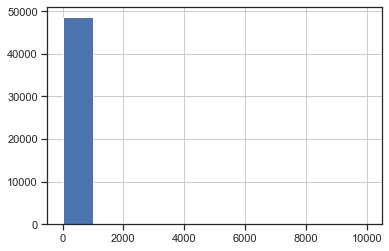

In [8]:
hist_price=dataset["price"].hist()

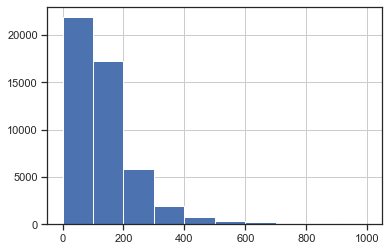

In [9]:
hist_price1=dataset["price"][dataset["price"]<1000].hist()

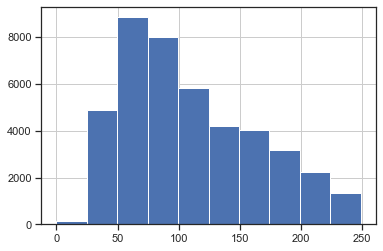

In [10]:
hist_price2=dataset["price"][dataset["price"]<250].hist()

In [11]:
dataset=dataset[dataset["price"]<250]

检查重复行：

In [12]:
dataset.duplicated().sum()

0

去除不必要的行：

In [13]:
dataset.drop(['name','id','host_id','last_review','host_name','neighbourhood'], axis = 1, inplace = True)

Index(['neighbourhood_group', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

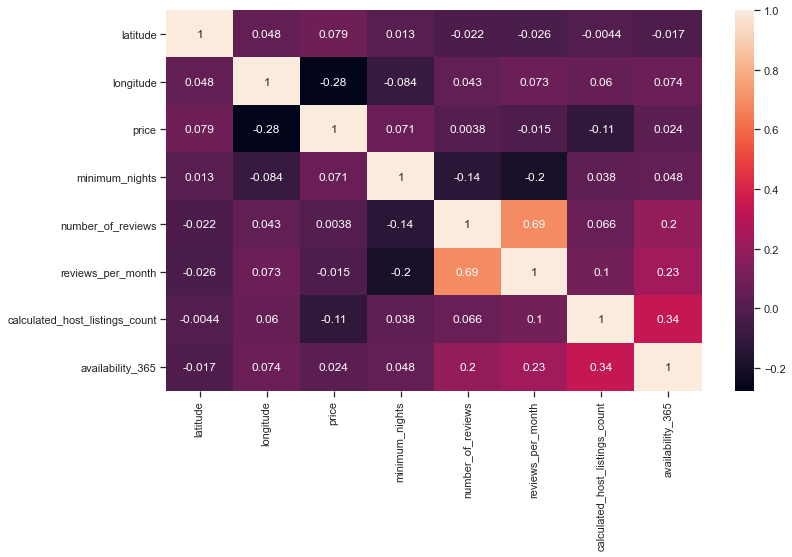

In [14]:
corr = dataset.corr(method='kendall')
plt.figure(figsize=(12,7))
sns.heatmap(corr, annot=True)
dataset.columns

In [15]:
y=dataset['price']
X=dataset.drop(['price'],axis=1)

In [16]:
X = pd.get_dummies(X, prefix=['neighbourhood_group', 'room_type'], drop_first=True)

In [17]:
X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size = 0.2, random_state= 0)

In [18]:
print('Dimensions of the training feature matrix: {}'.format(X_train.shape))
print('Dimensions of the training target vector: {}'.format(y_train.shape))
print('Dimensions of the test feature matrix: {}'.format(X_test.shape))
print('Dimensions of the test target vector: {}'.format(y_test.shape))

Dimensions of the training feature matrix: (34135, 13)
Dimensions of the training target vector: (34135,)
Dimensions of the test feature matrix: (8534, 13)
Dimensions of the test target vector: (8534,)


In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [30]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV
param_grid = [{'n_estimators': [50,500,900], 'learning_rate': [0.01,0.1,1]}]
gbreg=GradientBoostingRegressor()
grid_search = GridSearchCV(gbreg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid=[{'learning_rate': [0.01, 0.1, 1],
                          'n_estimators': [50, 500, 900]}],
             return_train_score=True, scoring='neg_mean_squared_error')

网格搜索最佳参数

In [32]:
grid_search.best_params_

{'learning_rate': 0.1, 'n_estimators': 900}

R2 score:  0.5815441396198857
RMSE:  34.99801362335561
   Actual Values  Predicted Values
0            215        143.225360
1             75        156.504707
2            149         96.622063
3             85        132.936577
4            130        144.926863


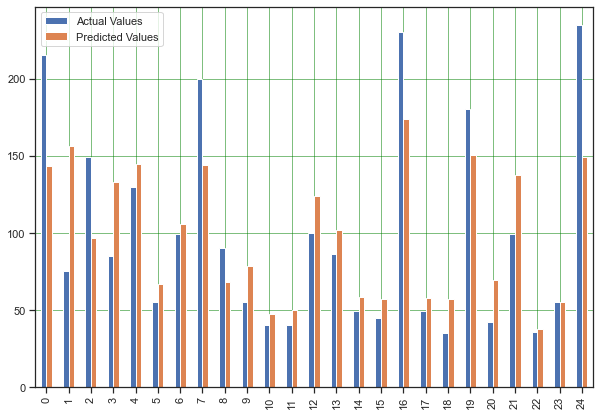

In [34]:
model1=grid_search.best_estimator_
y_pred=model1.predict(X_test)

from sklearn.metrics import r2_score
print("R2 score: ",r2_score(y_test,y_pred))
print("RMSE: ",np.sqrt(mean_squared_error(y_test,y_pred)))

error_diff = pd.DataFrame({'Actual Values': np.array(y_test).flatten(), 'Predicted Values': y_pred.flatten()})
print(error_diff.head(5))

#Visualize the error
df1 = error_diff.head(25)
df1.plot(kind='bar',figsize=(10,7))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [57]:
dataset2 = pd.read_csv(r"D:/DATA/AB_NYC_2019.csv")

In [58]:
dataset2.fillna({'reviews_per_month':0}, inplace=True) #填空值
dataset2.fillna({'name':"noname"}, inplace=True)
dataset2.fillna({'host_name':"nohostname"}, inplace=True)
dataset2.fillna({'last_review':"notreviewed"}, inplace=True)

In [59]:
dataset2.drop(['name','id','host_id','last_review','host_name','neighbourhood'], axis = 1, inplace = True)

In [60]:
y2=dataset2['price']
X2=dataset2.drop(['price'],axis=1)

In [61]:
X2 = pd.get_dummies(X2, prefix=['neighbourhood_group', 'room_type'], drop_first=True)

In [62]:
X_train2, X_test2, y_train2, y_test2 =  train_test_split(X2,y2,test_size = 0.2, random_state= 0)

In [63]:
print('Dimensions of the training feature matrix: {}'.format(X_train2.shape))
print('Dimensions of the training target vector: {}'.format(y_train2.shape))
print('Dimensions of the test feature matrix: {}'.format(X_test2.shape))
print('Dimensions of the test target vector: {}'.format(y_test2.shape))

Dimensions of the training feature matrix: (39116, 13)
Dimensions of the training target vector: (39116,)
Dimensions of the test feature matrix: (9779, 13)
Dimensions of the test target vector: (9779,)


R2 score:  -0.25577749545527184
RMSE:  262.89879252672864
   Actual Values  Predicted Values
0            225        379.675201
1            649        256.961130
2            300        208.642989
3             26         41.508656
4            125        133.213625


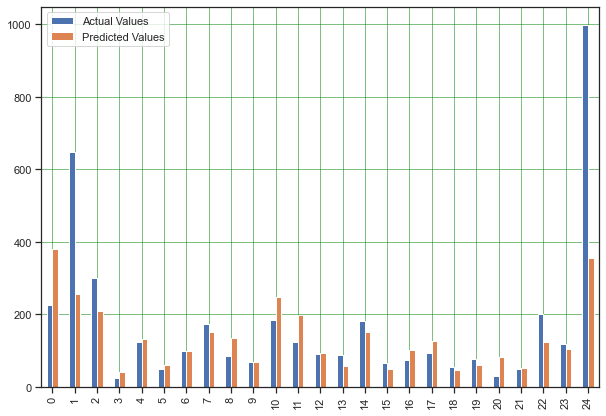

In [65]:
model2 = GradientBoostingRegressor(n_estimators=900, learning_rate=0.1)
model2.fit(X_train2,y_train2)

y_pred2=model2.predict(X_test2)

from sklearn.metrics import r2_score
print("R2 score: ",r2_score(y_test2,y_pred2))
print("RMSE: ",np.sqrt(mean_squared_error(y_test2,y_pred2)))

error_diff = pd.DataFrame({'Actual Values': np.array(y_test2).flatten(), 'Predicted Values': y_pred2.flatten()})
print(error_diff.head(5))

df1 = error_diff.head(25)
df1.plot(kind='bar',figsize=(10,7))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [69]:
import tpot

In [75]:
from tpot import TPOTRegressor
model3=TPOTRegressor(generations=5,population_size=20,verbosity=2,scoring='r2')
model3.fit(X_train2,y_train2)
print(model3.score(X_test2,y_test2))


Generation 1 - Current best internal CV score: 0.18682790327212134

Generation 2 - Current best internal CV score: 0.18682790327212134

Generation 3 - Current best internal CV score: 0.18682790327212134

Generation 4 - Current best internal CV score: 0.18682790327212134

Generation 5 - Current best internal CV score: 0.18682790327212134

Best pipeline: RandomForestRegressor(input_matrix, bootstrap=True, max_features=0.8500000000000001, min_samples_leaf=3, min_samples_split=6, n_estimators=100)
0.15006458402397094
